# Structured Data Learning with Keras FFNN

## Table of Contents
1. [Introduction](#Introduction)
2. [Setup](#Setup)
3. [Prepare the Data](#Prepare-the-Data)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Data Preprocessing and Feature Engineering](#Feature-Engineering)
6. [Prepare Datasets and Build Baseline](#Datasets-and-Baseline)
7. [Train Keras FFNN](#Train-Keras-Neural-Network)
8. [Conclusion](#Conclusion)

## Introduction

The objective of this notebook is to explore the application of a Keras-based Feed-Forward Neural Network (FFNN), a type of artificial neural network implemented using the Keras framework. It consists of an input layer, one or more hidden layers, and an output layer. The information flows forward from the input layer through the hidden layers to the output layer, without any feedback loops or recurrent connections. Each layer is composed of neurons (or nodes) that receive input from the previous layer, apply an activation function, and pass the output to the next layer. The network is trained using backpropagation to learn the optimal weights and biases for making predictions or classifications based on the input data. 

### Dataset Overview
The dataset was created with the aim of reducing academic dropout and failure rates in higher education. By employing machine learning techniques, the project seeks to identify at-risk students at an early stage, enabling targeted interventions.

### Notebook Structure
The notebook is structured into various sections, each focusing on different aspects of the machine learning pipeline, from data preparation to model evaluation. Two experiments will be conducted: a baseline model for comparison and the TabTransformer model.

In [1]:
# Installing TensorFlow
!pip install -q kaggle tensorflow


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Installing required packages
!pip install -U tensorflow-addons


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Prepare the Data

In this section, we will download the 'Predict Students Dropout and Academic Success' dataset from Kaggle. We will then explore the dataset to understand its structure, types of features, and the target variable. Finally, we will preprocess the data to make it suitable for machine learning models.

### Steps
1. Download the dataset
2. Explore the dataset
3. Handle missing values
4. Encode categorical variables
5. Normalize numerical features

In [3]:
!kaggle datasets download -d naveenkumar20bps1137/predict-students-dropout-and-academic-success

Dataset URL: https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success
License(s): CC0-1.0
predict-students-dropout-and-academic-success.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip predict-students-dropout-and-academic-success.zip

Archive:  predict-students-dropout-and-academic-success.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
# Importing required libraries
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os

2024-04-18 15:56:54.712837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 15:56:54.872422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-18 15:56:54.872447: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-18 15:56:54.922908: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 15:56:56.076823: W tensorflow/stream_executor/pla

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataframe
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

## Exploratory Data Analysis

Before diving into data preprocessing and feature engineering, it's beneficial to perform some basic exploratory data analysis (EDA). This will give us insights into the dataset's characteristics, distributions, and potential patterns.

### Steps
1. Summary statistics
2. Missing value analysis
3. Target variable distribution
4. Feature distributions
5. Correlation analysis

In [7]:
# Summary statistics for numerical features
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### Summary Statistics Observations

- Most of the features are numerical.
- There are no missing values in the dataset.
- Features like `Age at enrollment`, `GDP`, and `Unemployment rate` have varying scales.
- The `mean` and `median` (50%) values for most features are relatively close, suggesting that the data may not be heavily skewed.

Next, let's visualize the distribution of the target variable.

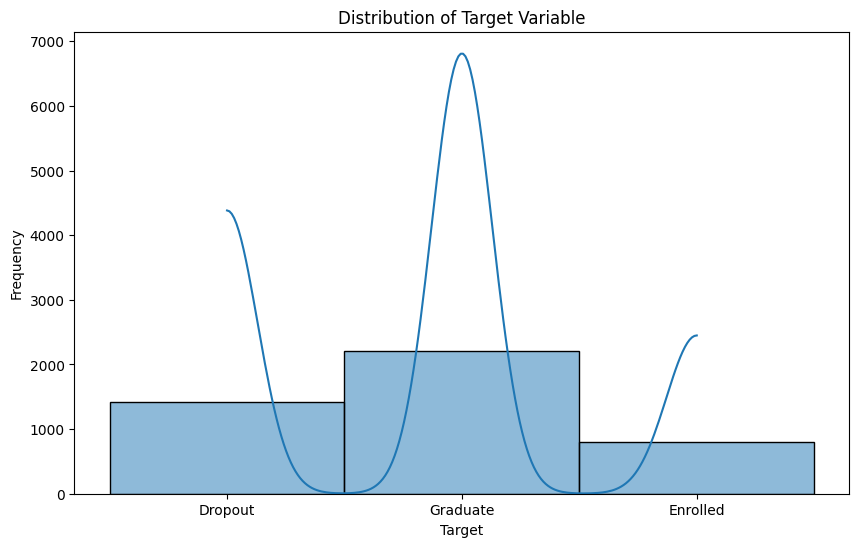

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Target'], bins=20, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

### Target Variable Distribution Observations

- The target variable is categorical with three classes: dropout, enrolled, and graduate.
- The distribution appears to be imbalanced, with the 'dropout' category being the most infrequent.
- The 'graduate' category has more instances, which could impact the model's performance.

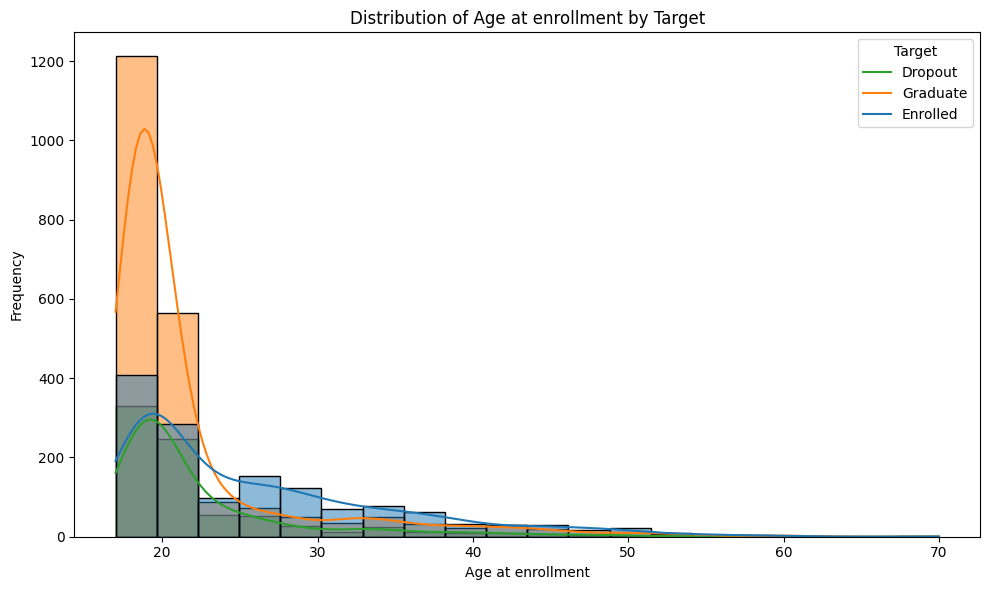

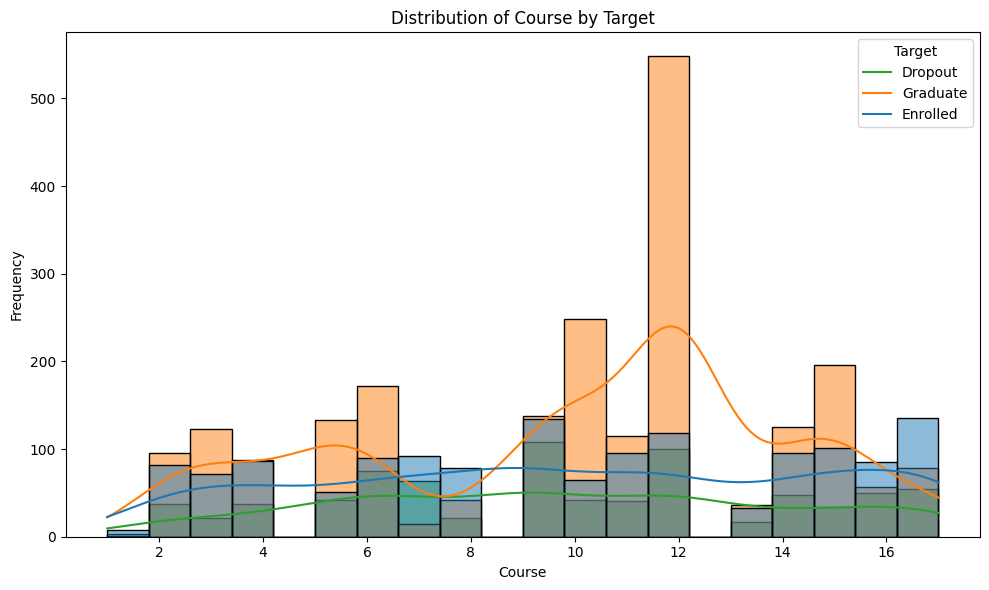

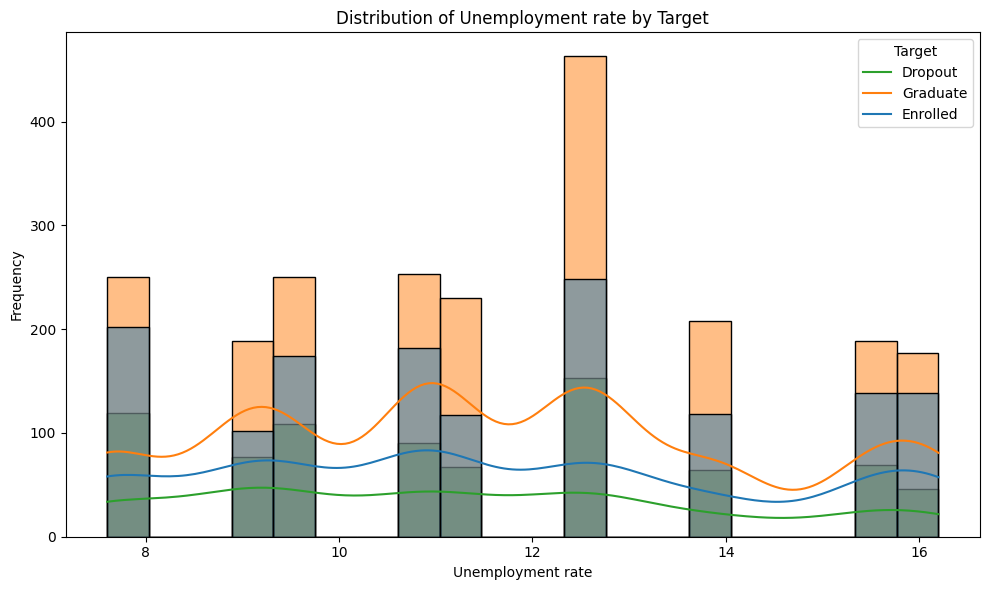

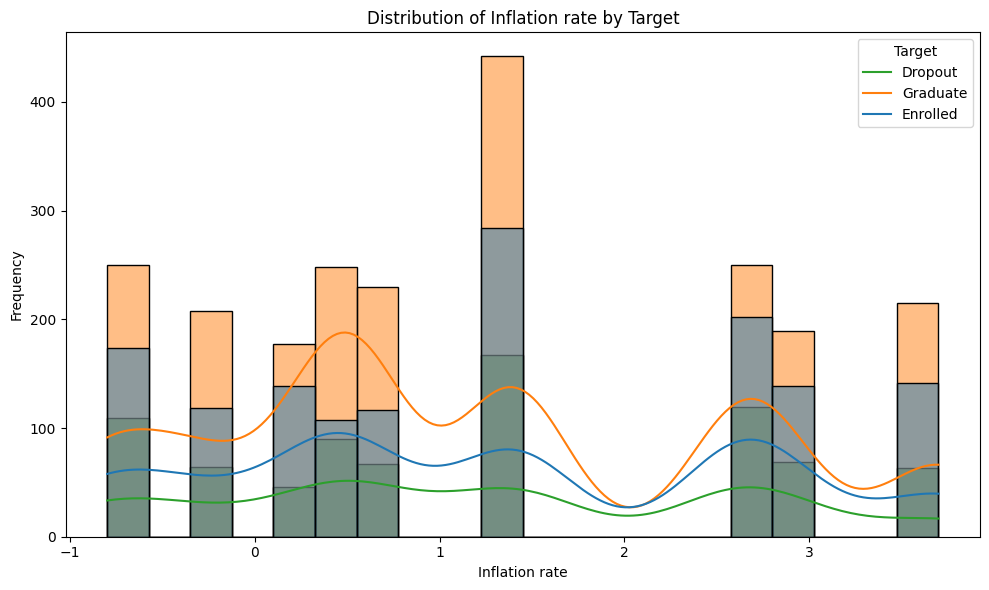

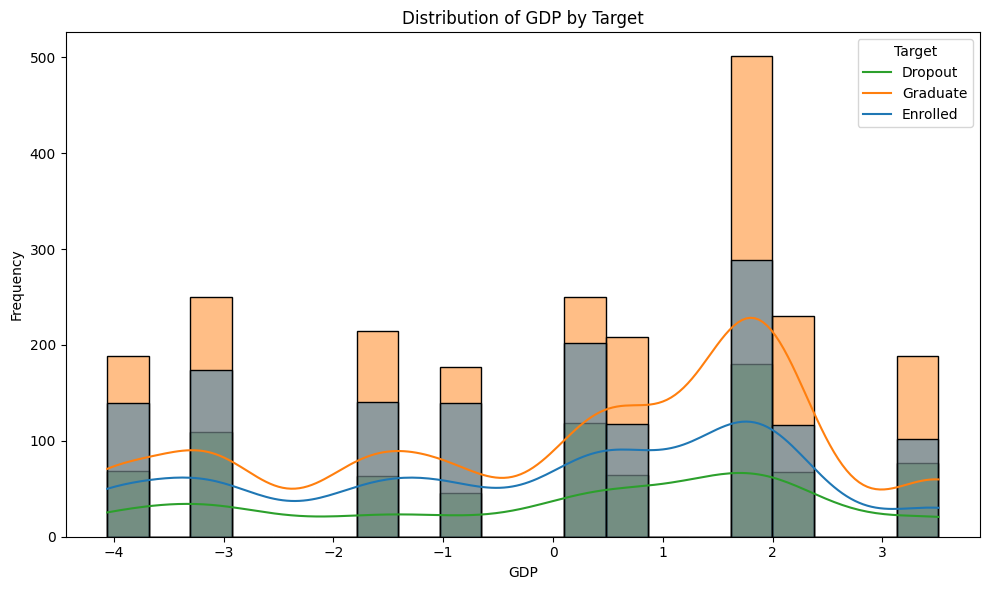

In [10]:
# Visualizing the distributions of selected features
selected_features = ['Age at enrollment', 'Course', 'Unemployment rate', 'Inflation rate', 'GDP']

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Target', bins=20, kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target', labels=['Dropout', 'Graduate', 'Enrolled'])
    plt.tight_layout()
    plt.show()

In [11]:
# Drop 'Enrolled' records from 'Target' column
df = df[df['Target'] != 'Enrolled']

# List of all Target values
target_values = df['Target'].unique()

# Print the Target values
print(target_values)

['Dropout' 'Graduate']


In [12]:
# Turn 'Dropout' into 0 and 'Graduate' into 1
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1})

# List of all Target values
target_updated = df['Target'].unique()

# Print the Target values
print(target_updated)

[0 1]


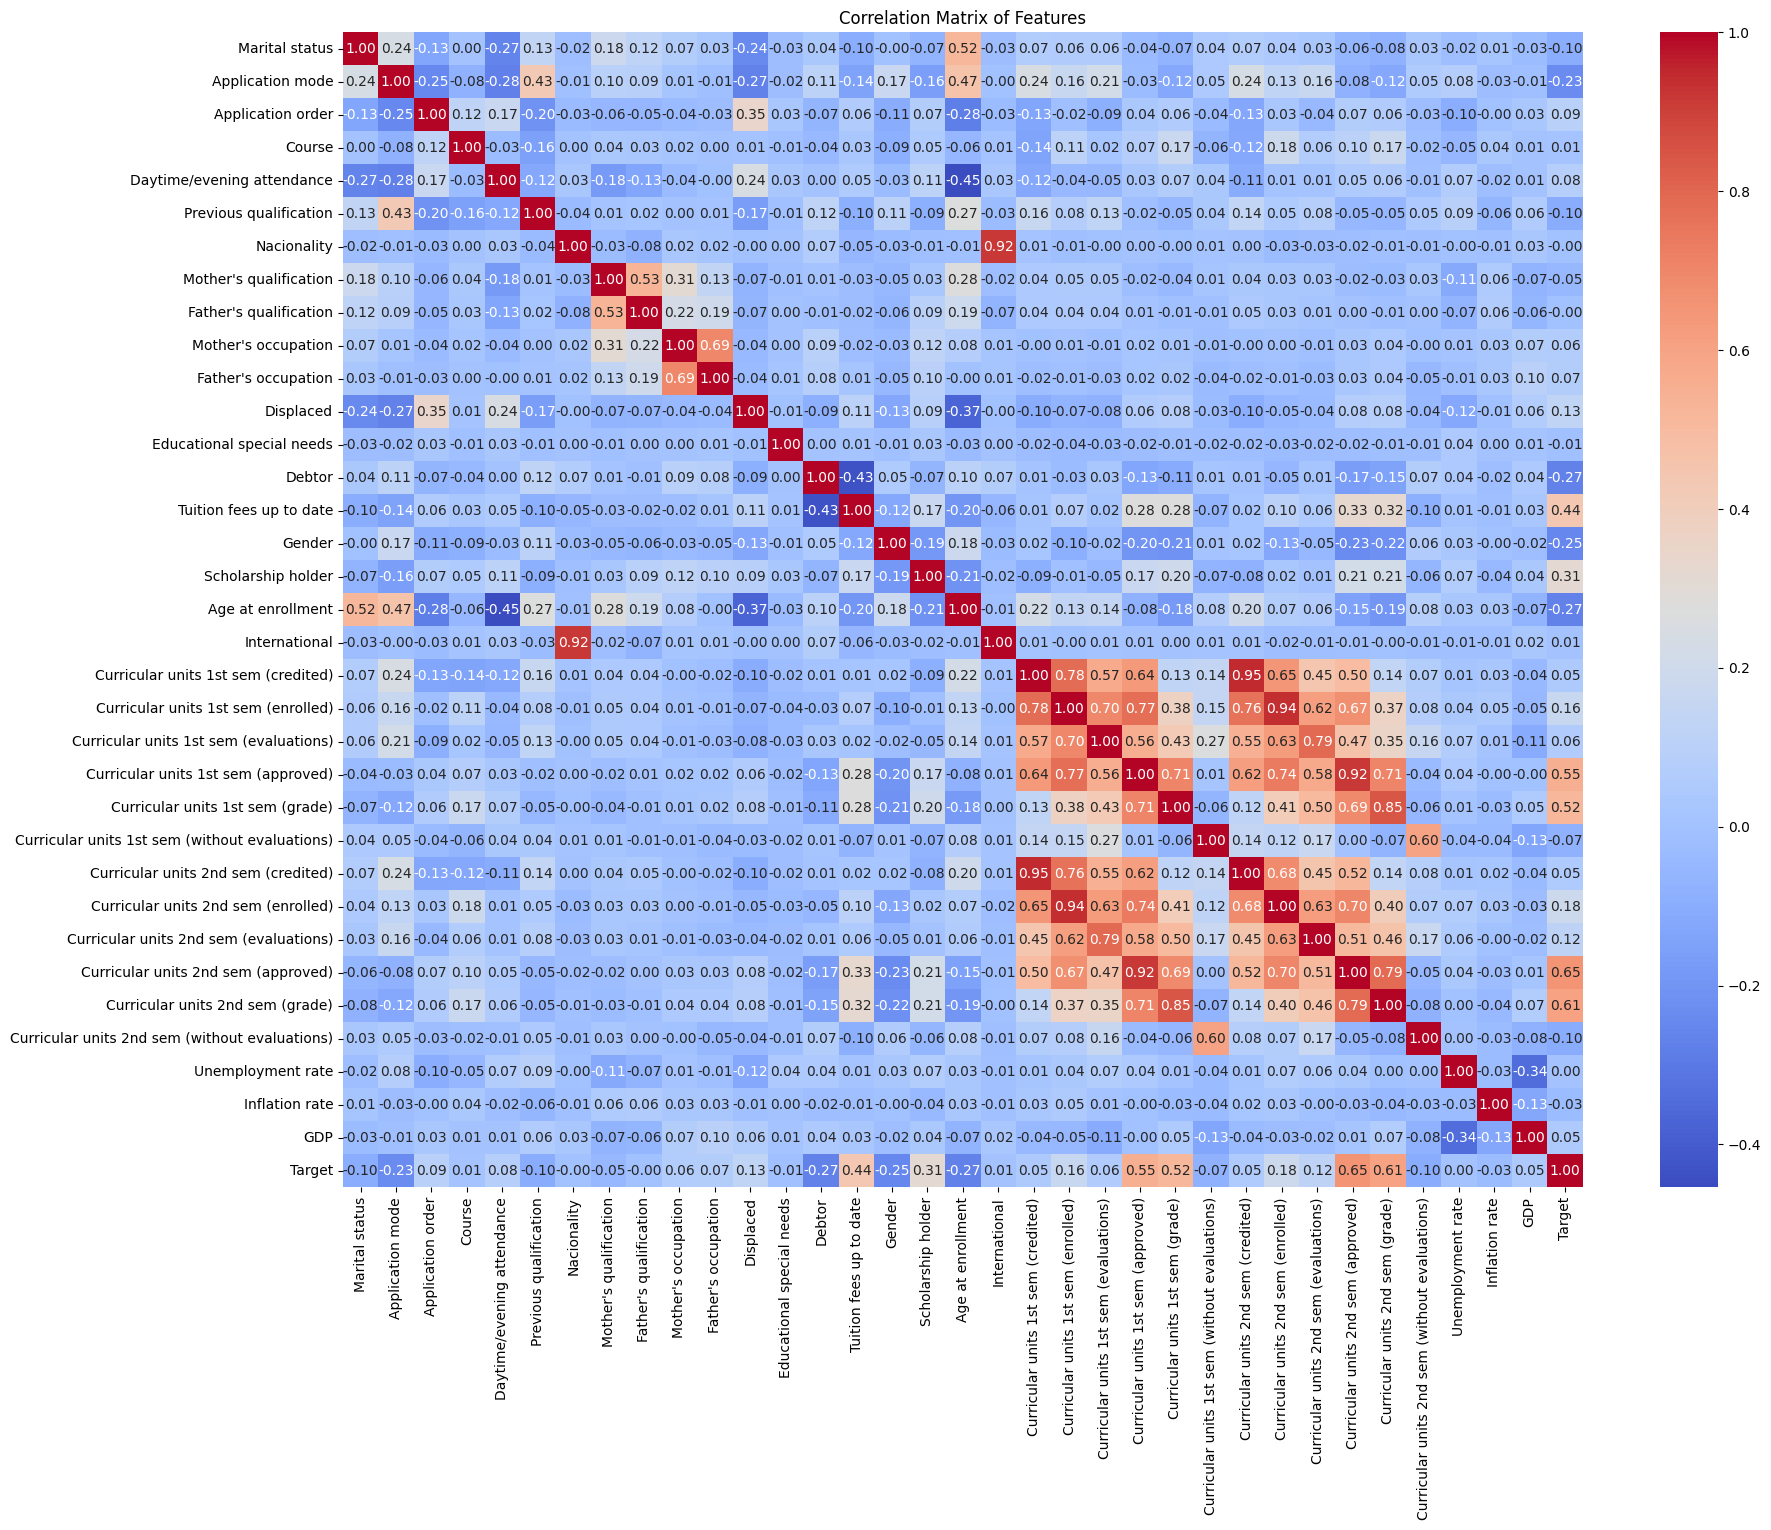

In [13]:
# Correlation analysis
correlation_matrix = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

### Correlation Analysis Observations

- The heatmap provides a visual representation of the correlation between different features.
- Features like `Curricular units 1st sem (credited)` and `Curricular units 1st sem (enrolled)` have a high positive correlation.
- Features like `Unemployment rate` and `GDP` have a negative correlation.
- Most features have low to moderate correlation with each other.

Understanding these correlations can be crucial for feature selection and engineering. It can also help in understanding how different features might collectively influence the target variable.

In [14]:
df['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns, excluding the 'Target' column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Target')

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled dataframe
df.head()

Marital status  Application mode  Application order    Course  \
0       -0.300686          0.226505           2.436822 -1.828415   
1       -0.300686         -0.154237          -0.562471  0.245261   
2       -0.300686         -1.106094           2.436822 -1.137190   
3       -0.300686          0.226505           0.187353  1.166895   
4        1.330837          0.987990          -0.562471 -1.598007   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                    0.355850               -0.392879    -0.142589   
1                    0.355850               -0.392879    -0.142589   
2                    0.355850               -0.392879    -0.142589   
3                    0.355850               -0.392879    -0.142589   
4                   -2.810171               -0.392879    -0.142589   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.049009               -0.606253            -0.327219  ...   
1               -1.283593               -1.243108            -0.866764  ...   
2                1.048460                0.940395             0.751869  ...   
3                1.159510                0.940395            -0.327219  ...   
4                1.048460                1.031374             0.751869  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.287686                            -2.782691   
1                            -0.287686                            -0.131002   
2                            -0.287686                            -0.131002   
3                            -0.287686                            -0.131002   
4                            -0.287686                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.190148          -0.311312   
1                                       -0.190148           0.850919   
2                                       -0.190148          -0.311312   
3                                       -0.190148          -0.836191   
4                                       -0.190148           0.850919   

   Inflation rate       GDP  Target  
0        0.121615  0.774119       0  
1       -1.106070  0.353704       1  
2        0.121615  0.774119       0  
3       -1.467154 -1.376634       1  
4       -1.106070  0.353704       1  

[5 rows x 35 columns]

## Datasets and Baseline

In [16]:
from sklearn.model_selection import train_test_split

# Separate features and target variable from the dataframe
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2904, 34), (726, 34), (2904,), (726,))

In [17]:
#Train a Baseline Model using Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8415977961432507,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.81      0.80       277\n           1       0.88      0.86      0.87       449\n\n    accuracy                           0.84       726\n   macro avg       0.83      0.84      0.83       726\nweighted avg       0.84      0.84      0.84       726\n')

In [19]:
print(accuracy)

0.8415977961432507


In [20]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       277
           1       0.88      0.86      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.83       726
weighted avg       0.84      0.84      0.84       726



# Train Keras Neural Network

In [18]:
# Build and train Feed-Forward Neural Network (FFNN)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data
X = df.drop(columns=["Target"]).values
y = df["Target"].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.max() + 1, activation='softmax')  # Assuming y_train is zero-based index
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
2024-04-18 15:59:50.929169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-18 15:59:50.929225: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-18 15:59:50.929267: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-82c09bc5-9c68-4b11-822d-79157848c862): /proc/driver/nvidia/version does not exist
2024-04-18 15:59:50.929588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
73/73 [==============================] - 1s 7ms/step - loss: 0.37

# Conclusion

## Summary of Results

The notebook aimed to address the problem of dropout prediction using tabular data. Two machine learning models were implemented and evaluated: Decision Trees and Feed-Forward Neural Networks (FFNN).

- **Decision Trees**: Served as the baseline model, with an accuracy of `84%`.
- **Feed-Forward Neural Networks**: Achieved a test accuracy of `89.8%`.

## Business Impact

Predicting dropouts can be a critical task in many sectors, including education and employee retention. Accurate models can:

1. **Reduce Costs**: Early identification of potential dropouts allows targeted interventions, saving costs related to dropout handling.
2. **Improve Resource Allocation**: Resources can be channeled more effectively towards at-risk cases.
3. **Enhance Strategy**: Data-driven insights can inform overall strategy, from marketing to product improvements.

## Future Work

1. **Hyperparameter Tuning**: The performance of the FFNN can be further optimized.
2. **Feature Engineering**: Additional features or transformations can be explored.
3. **Ensemble Methods**: Combining multiple models may yield better results.

The models serve as a good starting point and demonstrate promising results. Ongoing optimization can enhance their predictive power, translating into tangible business benefits.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82c09bc5-9c68-4b11-822d-79157848c862' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>